In [663]:
# 시각화 스타일
!pip install mplcyberpunk

### 데이터 수집하기 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MacOS - 한글 폰트
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Graph Style 적용
import mplcyberpunk
plt.style.use('cyberpunk')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr


In [664]:
# 삼성전자(ss) , 네이버(naver) , 카카오 주가 불러오기

ss = yf.download("005930.KS", start="2022-01-01", end="2023-10-31")
naver = yf.download("035420.KS", start="2022-01-01", end="2023-10-31")
kakao = yf.download("035720.KS", start="2022-01-01", end="2023-10-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [665]:
# shape 

print(ss.shape, naver.shape, kakao.shape)

(444, 6) (441, 6) (441, 6)


In [666]:
ss

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,78800.0,79200.0,78300.0,78700.0,75986.742188,12427416
2022-01-05,78800.0,79000.0,76400.0,77400.0,74731.570312,25470640
2022-01-06,76700.0,77600.0,76600.0,76900.0,74248.804688,12931954
2022-01-07,78100.0,78400.0,77400.0,78300.0,75600.523438,15163757
2022-01-10,78100.0,78100.0,77100.0,78000.0,75310.882812,9947422
...,...,...,...,...,...,...
2023-10-24,68700.0,68800.0,67700.0,68500.0,68500.000000,12791710
2023-10-25,68800.0,68800.0,67900.0,68000.0,68000.000000,10610703
2023-10-26,67000.0,67900.0,66700.0,66700.0,66700.000000,15517624


In [667]:
naver

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,376000.0,376000.0,365000.0,365500.0,363833.81250,803676
2022-01-05,362000.0,362000.0,352000.0,355000.0,353381.68750,1151703
2022-01-06,348500.0,349500.0,337500.0,338500.0,336956.90625,1280916
2022-01-07,338000.0,343500.0,337000.0,338000.0,336459.18750,787839
2022-01-10,339000.0,339500.0,329000.0,335000.0,333472.87500,828611
...,...,...,...,...,...,...
2023-10-24,181500.0,187100.0,180100.0,187000.0,187000.00000,802790
2023-10-25,189900.0,191200.0,184800.0,189100.0,189100.00000,802846
2023-10-26,184000.0,186800.0,181300.0,181900.0,181900.00000,757629


In [668]:
kakao

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,114838.320312,115342.000000,111816.257812,112319.937500,112196.054688,2378714
2022-01-05,111816.257812,111816.257812,105772.132812,106275.812500,106158.601562,5071136
2022-01-06,103253.750000,103757.429688,100634.632812,100735.367188,100624.265625,7068448
2022-01-07,100735.367188,102246.398438,100533.898438,100735.367188,100624.265625,3933744
2022-01-10,100735.367188,101239.046875,95900.070312,97310.367188,97203.039062,5338491
...,...,...,...,...,...,...
2023-10-24,38300.000000,39700.000000,37850.000000,39600.000000,39600.000000,2739742
2023-10-25,39600.000000,39650.000000,38850.000000,38950.000000,38950.000000,1422352
2023-10-26,38250.000000,38500.000000,37400.000000,37650.000000,37650.000000,2073618


### 데이터 전처리 

In [ ]:
# pandas.concat() 함수로 데이터프레임 합치기

In [669]:
#  왼쪽 + 오른쪽으로 DataFrame 합치기(cbind) : axis = 1
# 위 + 아래로 DataFrame 합치기(rbind) : axis = 0


df = pd.concat([
    kakao[['Adj Close', 'Volume']],
    naver[['Adj Close', 'Volume']],
    ss[['Adj Close', 'Volume']],
    ], axis=1)

df.columns = [
    'kakao_ad', 'kakao_v', 
    'naver_ad', 'naver_v', 
    'ss_ad', 'ss_v', 
    
]


In [670]:
df

,kakao_ad,kakao_v,naver_ad,naver_v,ss_ad,ss_v
Date,,,,,,
2022-01-04,112196.054688,2378714.0,363833.81250,803676.0,75986.742188,12427416
2022-01-05,106158.601562,5071136.0,353381.68750,1151703.0,74731.570312,25470640
2022-01-06,100624.265625,7068448.0,336956.90625,1280916.0,74248.804688,12931954
2022-01-07,100624.265625,3933744.0,336459.18750,787839.0,75600.523438,15163757
2022-01-10,97203.039062,5338491.0,333472.87500,828611.0,75310.882812,9947422
...,...,...,...,...,...,...
2023-10-24,39600.000000,2739742.0,187000.00000,802790.0,68500.000000,12791710
2023-10-25,38950.000000,1422352.0,189100.00000,802846.0,68000.000000,10610703
2023-10-26,37650.000000,2073618.0,181900.00000,757629.0,66700.000000,15517624


In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,6))

ax_li = axes.flatten()
df_cols = df.columns
for i, (col, ax) in enumerate(zip(df_cols, ax_li)):
    ax.plot(df[col], linewidth=0.8)
    ax.set_title(col)

plt.tight_layout()
plt.show()


###  Granger 인과검정

In [ ]:
# VAR 예측을 수행하기 전에 해당 변수들이 모두 상호연관성이 있는가를 확인 검증
# Granger 인과검정
# 귀무가설: X가 Y에 영향을 미치지 않는다


In [602]:
# 검정 값(p-value)을 판다스 데이터프레임으로 한번에 표시할 것이다.
# 이를 위해 값을 저장할 데이터프레임을 만들어주자. 값은 우선 0으로 채운다


In [671]:
df_pairs = pd.DataFrame(data=np.zeros((len(df_cols), len(df_cols))),
                        columns = ['X_'+x for x in df_cols],
                        index = ['Y_'+x for x in df_cols])
df_pairs


,X_kakao_ad,X_kakao_v,X_naver_ad,X_naver_v,X_ss_ad,X_ss_v
Y_kakao_ad,0.0,0.0,0.0,0.0,0.0,0.0
Y_kakao_v,0.0,0.0,0.0,0.0,0.0,0.0
Y_naver_ad,0.0,0.0,0.0,0.0,0.0,0.0
Y_naver_v,0.0,0.0,0.0,0.0,0.0,0.0
Y_ss_ad,0.0,0.0,0.0,0.0,0.0,0.0
Y_ss_v,0.0,0.0,0.0,0.0,0.0,0.0


In [672]:
 # granger 인과검정을 실시

In [673]:
from statsmodels.tsa.stattools import grangercausalitytests

df.dropna(inplace=True) # 결측치 제거

df['kakao_ad'].diff()
sample_outs = grangercausalitytests(df[['kakao_ad','kakao_v']], maxlag=4)
print(sample_outs)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4455  , p=0.5049  , df_denom=437, df_num=1
ssr based chi2 test:   chi2=0.4485  , p=0.5030  , df=1
likelihood ratio test: chi2=0.4483  , p=0.5032  , df=1
parameter F test:         F=0.4455  , p=0.5049  , df_denom=437, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1092  , p=0.8966  , df_denom=434, df_num=2
ssr based chi2 test:   chi2=0.2209  , p=0.8954  , df=2
likelihood ratio test: chi2=0.2208  , p=0.8955  , df=2
parameter F test:         F=0.1092  , p=0.8966  , df_denom=434, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1905  , p=0.9029  , df_denom=431, df_num=3
ssr based chi2 test:   chi2=0.5806  , p=0.9008  , df=3
likelihood ratio test: chi2=0.5803  , p=0.9009  , df=3
parameter F test:         F=0.1905  , p=0.9029  , df_denom=431, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1133  , p=0.9778  

In [674]:
# f테스트, 카이제곱 등의 여러 검정통계량 결과값

sample_outs[1][0]['ssr_chi2test']


(0.44851225727693916, 0.503042307637652, 1)

In [607]:
[round(sample_outs[x][0]['ssr_chi2test'][1],2) for x in range(1,5)]

# p_value 판단 : 귀무가설을 기각할 수 없다.

[0.5, 0.9, 0.9, 0.98]

In [608]:
maxlag = 14
for col_i, col in enumerate(df_cols):
    for idx_i, idx in enumerate(df_cols):
        outs = grangercausalitytests(df[[col,idx]], maxlag=maxlag)
        pval_min = np.min([round(outs[x][0]['ssr_chi2test'][1],2) for x in range(1, maxlag+1)])
        df_pairs.iloc[idx_i, col_i] = pval_min


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=438, df_num=1
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=1
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=1
parameter F test:         F=43683.8578, p=0.0000  , df_denom=438, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=436, df_num=2
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=2
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=2
parameter F test:         F=22059.0679, p=0.0000  , df_denom=436, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=434, df_num=3
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=3
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=3
parameter F test:         F=14894.7373, p=0.0000  , df_denom=434, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0000  , p=1.

ssr based F test:         F=0.9760  , p=0.4482  , df_denom=419, df_num=7
ssr based chi2 test:   chi2=7.0764  , p=0.4210  , df=7
likelihood ratio test: chi2=7.0193  , p=0.4269  , df=7
parameter F test:         F=0.9760  , p=0.4482  , df_denom=419, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=0.9178  , p=0.5014  , df_denom=416, df_num=8
ssr based chi2 test:   chi2=7.6423  , p=0.4692  , df=8
likelihood ratio test: chi2=7.5756  , p=0.4760  , df=8
parameter F test:         F=0.9178  , p=0.5014  , df_denom=416, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.7527  , p=0.6604  , df_denom=413, df_num=9
ssr based chi2 test:   chi2=7.0863  , p=0.6281  , df=9
likelihood ratio test: chi2=7.0288  , p=0.6341  , df=9
parameter F test:         F=0.7527  , p=0.6604  , df_denom=413, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.6633  , p=0.7586  , df_denom=410, df_num=10
ssr based chi2 test

ssr based F test:         F=0.8472  , p=0.6097  , df_denom=401, df_num=13
ssr based chi2 test:   chi2=11.7547 , p=0.5479  , df=13
likelihood ratio test: chi2=11.5961 , p=0.5610  , df=13
parameter F test:         F=0.8472  , p=0.6097  , df_denom=401, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=0.9067  , p=0.5517  , df_denom=398, df_num=14
ssr based chi2 test:   chi2=13.6180 , p=0.4785  , df=14
likelihood ratio test: chi2=13.4054 , p=0.4949  , df=14
parameter F test:         F=0.9067  , p=0.5517  , df_denom=398, df_num=14

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0040  , p=0.9493  , df_denom=437, df_num=1
ssr based chi2 test:   chi2=0.0041  , p=0.9491  , df=1
likelihood ratio test: chi2=0.0041  , p=0.9491  , df=1
parameter F test:         F=0.0040  , p=0.9493  , df_denom=437, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4610  , p=0.6310  , df_denom=434, df_num=2
ssr based ch

ssr based F test:         F=0.0000  , p=1.0000  , df_denom=428, df_num=6
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=6
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=6
parameter F test:         F=21.6544 , p=0.0000  , df_denom=428, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=426, df_num=7
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=7
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=7
parameter F test:         F=18.6764 , p=0.0000  , df_denom=426, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=424, df_num=8
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=8
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=8
parameter F test:         F=16.2608 , p=0.0000  , df_denom=424, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=422, df_num=9
ssr based chi2 test: 

ssr based F test:         F=0.3484  , p=0.9311  , df_denom=419, df_num=7
ssr based chi2 test:   chi2=2.5262  , p=0.9251  , df=7
likelihood ratio test: chi2=2.5189  , p=0.9257  , df=7
parameter F test:         F=0.3484  , p=0.9311  , df_denom=419, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=0.2885  , p=0.9697  , df_denom=416, df_num=8
ssr based chi2 test:   chi2=2.4022  , p=0.9661  , df=8
likelihood ratio test: chi2=2.3955  , p=0.9664  , df=8
parameter F test:         F=0.2885  , p=0.9697  , df_denom=416, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.3713  , p=0.9485  , df_denom=413, df_num=9
ssr based chi2 test:   chi2=3.4954  , p=0.9414  , df=9
likelihood ratio test: chi2=3.4813  , p=0.9421  , df=9
parameter F test:         F=0.3713  , p=0.9485  , df_denom=413, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.5474  , p=0.8561  , df_denom=410, df_num=10
ssr based chi2 test

ssr based F test:         F=0.3850  , p=0.8591  , df_denom=425, df_num=5
ssr based chi2 test:   chi2=1.9751  , p=0.8526  , df=5
likelihood ratio test: chi2=1.9706  , p=0.8532  , df=5
parameter F test:         F=0.3850  , p=0.8591  , df_denom=425, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=0.4409  , p=0.8513  , df_denom=422, df_num=6
ssr based chi2 test:   chi2=2.7271  , p=0.8422  , df=6
likelihood ratio test: chi2=2.7186  , p=0.8432  , df=6
parameter F test:         F=0.4409  , p=0.8513  , df_denom=422, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=0.3416  , p=0.9345  , df_denom=419, df_num=7
ssr based chi2 test:   chi2=2.4769  , p=0.9288  , df=7
likelihood ratio test: chi2=2.4699  , p=0.9293  , df=7
parameter F test:         F=0.3416  , p=0.9345  , df_denom=419, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=0.8192  , p=0.5859  , df_denom=416, df_num=8
ssr based chi2 test: 

parameter F test:         F=0.7241  , p=0.6304  , df_denom=422, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=0.6328  , p=0.7288  , df_denom=419, df_num=7
ssr based chi2 test:   chi2=4.5884  , p=0.7100  , df=7
likelihood ratio test: chi2=4.5643  , p=0.7130  , df=7
parameter F test:         F=0.6328  , p=0.7288  , df_denom=419, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=0.6124  , p=0.7676  , df_denom=416, df_num=8
ssr based chi2 test:   chi2=5.0995  , p=0.7469  , df=8
likelihood ratio test: chi2=5.0698  , p=0.7501  , df=8
parameter F test:         F=0.6124  , p=0.7676  , df_denom=416, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.5418  , p=0.8439  , df_denom=413, df_num=9
ssr based chi2 test:   chi2=5.1009  , p=0.8254  , df=9
likelihood ratio test: chi2=5.0710  , p=0.8281  , df=9
parameter F test:         F=0.5418  , p=0.8439  , df_denom=413, df_num=9

Granger Causality
nu

ssr based F test:         F=1.2621  , p=0.2442  , df_denom=407, df_num=11
ssr based chi2 test:   chi2=14.6674 , p=0.1982  , df=11
likelihood ratio test: chi2=14.4227 , p=0.2105  , df=11
parameter F test:         F=1.2621  , p=0.2442  , df_denom=407, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=1.1562  , p=0.3130  , df_denom=404, df_num=12
ssr based chi2 test:   chi2=14.7330 , p=0.2564  , df=12
likelihood ratio test: chi2=14.4856 , p=0.2708  , df=12
parameter F test:         F=1.1562  , p=0.3130  , df_denom=404, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=1.1208  , p=0.3392  , df_denom=401, df_num=13
ssr based chi2 test:   chi2=15.5508 , p=0.2742  , df=13
likelihood ratio test: chi2=15.2750 , p=0.2905  , df=13
parameter F test:         F=1.1208  , p=0.3392  , df_denom=401, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=1.0589  , p=0.3938  , df_denom=398, df_num=14
ssr b

likelihood ratio test: chi2=18.1690 , p=0.1107  , df=12
parameter F test:         F=1.4565  , p=0.1379  , df_denom=404, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=1.4174  , p=0.1478  , df_denom=401, df_num=13
ssr based chi2 test:   chi2=19.6674 , p=0.1038  , df=13
likelihood ratio test: chi2=19.2289 , p=0.1162  , df=13
parameter F test:         F=1.4174  , p=0.1478  , df_denom=401, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=1.3059  , p=0.2004  , df_denom=398, df_num=14
ssr based chi2 test:   chi2=19.6147 , p=0.1428  , df=14
likelihood ratio test: chi2=19.1775 , p=0.1583  , df=14
parameter F test:         F=1.3059  , p=0.2004  , df_denom=398, df_num=14

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=438, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=1
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=1
parameter F test:         F

ssr based chi2 test:   chi2=18.0255 , p=0.2056  , df=14
likelihood ratio test: chi2=17.6554 , p=0.2229  , df=14
parameter F test:         F=1.2001  , p=0.2724  , df_denom=398, df_num=14

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6886  , p=0.0554  , df_denom=437, df_num=1
ssr based chi2 test:   chi2=3.7139  , p=0.0540  , df=1
likelihood ratio test: chi2=3.6983  , p=0.0545  , df=1
parameter F test:         F=3.6886  , p=0.0554  , df_denom=437, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3284  , p=0.0368  , df_denom=434, df_num=2
ssr based chi2 test:   chi2=6.7335  , p=0.0345  , df=2
likelihood ratio test: chi2=6.6824  , p=0.0354  , df=2
parameter F test:         F=3.3284  , p=0.0368  , df_denom=434, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0783  , p=0.0274  , df_denom=431, df_num=3
ssr based chi2 test:   chi2=9.3850  , p=0.0246  , df=3
likelihood ratio test: chi2=9.2858  

ssr based F test:         F=1.0642  , p=0.3891  , df_denom=401, df_num=13
ssr based chi2 test:   chi2=14.7656 , p=0.3222  , df=13
likelihood ratio test: chi2=14.5166 , p=0.3385  , df=13
parameter F test:         F=1.0642  , p=0.3891  , df_denom=401, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=1.0641  , p=0.3889  , df_denom=398, df_num=14
ssr based chi2 test:   chi2=15.9831 , p=0.3144  , df=14
likelihood ratio test: chi2=15.6912 , p=0.3326  , df=14
parameter F test:         F=1.0641  , p=0.3889  , df_denom=398, df_num=14

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0032  , p=0.9552  , df_denom=437, df_num=1
ssr based chi2 test:   chi2=0.0032  , p=0.9550  , df=1
likelihood ratio test: chi2=0.0032  , p=0.9550  , df=1
parameter F test:         F=0.0032  , p=0.9552  , df_denom=437, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3436  , p=0.7094  , df_denom=434, df_num=2
ssr based ch

ssr based chi2 test:   chi2=11.4934 , p=0.5696  , df=13
likelihood ratio test: chi2=11.3418 , p=0.5822  , df=13
parameter F test:         F=0.8283  , p=0.6300  , df_denom=401, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=0.7756  , p=0.6959  , df_denom=398, df_num=14
ssr based chi2 test:   chi2=11.6500 , p=0.6344  , df=14
likelihood ratio test: chi2=11.4939 , p=0.6469  , df=14
parameter F test:         F=0.7756  , p=0.6959  , df_denom=398, df_num=14

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0023  , p=0.9619  , df_denom=437, df_num=1
ssr based chi2 test:   chi2=0.0023  , p=0.9618  , df=1
likelihood ratio test: chi2=0.0023  , p=0.9618  , df=1
parameter F test:         F=0.0023  , p=0.9619  , df_denom=437, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6670  , p=0.5138  , df_denom=434, df_num=2
ssr based chi2 test:   chi2=1.3494  , p=0.5093  , df=2
likelihood ratio test: chi2=1.3

likelihood ratio test: chi2=0.0286  , p=0.8657  , df=1
parameter F test:         F=0.0284  , p=0.8662  , df_denom=437, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0858  , p=0.1254  , df_denom=434, df_num=2
ssr based chi2 test:   chi2=4.2197  , p=0.1213  , df=2
likelihood ratio test: chi2=4.1996  , p=0.1225  , df=2
parameter F test:         F=2.0858  , p=0.1254  , df_denom=434, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4474  , p=0.2284  , df_denom=431, df_num=3
ssr based chi2 test:   chi2=4.4127  , p=0.2202  , df=3
likelihood ratio test: chi2=4.3907  , p=0.2223  , df=3
parameter F test:         F=1.4474  , p=0.2284  , df_denom=431, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4437  , p=0.0460  , df_denom=428, df_num=4
ssr based chi2 test:   chi2=9.9803  , p=0.0408  , df=4
likelihood ratio test: chi2=9.8680  , p=0.0427  , df=4
parameter F test:         F=2.4437  , p

likelihood ratio test: chi2=13.4555 , p=0.1431  , df=9
parameter F test:         F=1.4518  , p=0.1639  , df_denom=413, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.2911  , p=0.2330  , df_denom=410, df_num=10
ssr based chi2 test:   chi2=13.5726 , p=0.1934  , df=10
likelihood ratio test: chi2=13.3633 , p=0.2041  , df=10
parameter F test:         F=1.2911  , p=0.2330  , df_denom=410, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=1.1863  , p=0.2943  , df_denom=407, df_num=11
ssr based chi2 test:   chi2=13.7863 , p=0.2450  , df=11
likelihood ratio test: chi2=13.5699 , p=0.2577  , df=11
parameter F test:         F=1.1863  , p=0.2943  , df_denom=407, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=1.0851  , p=0.3710  , df_denom=404, df_num=12
ssr based chi2 test:   chi2=13.8264 , p=0.3119  , df=12
likelihood ratio test: chi2=13.6083 , p=0.3264  , df=12
parameter F test:        

In [609]:
df_pairs

,X_kakao_ad,X_kakao_v,X_naver_ad,X_naver_v,X_ss_ad,X_ss_v
Y_kakao_ad,1.00,0.08,0.17,0.00,0.02,0.15
Y_kakao_v,0.50,1.00,0.56,0.00,0.49,0.02
Y_naver_ad,0.31,0.14,1.00,0.00,0.01,0.01
Y_naver_v,0.17,0.00,0.32,1.00,0.35,0.46
Y_ss_ad,0.35,0.31,0.20,0.23,1.00,0.03
Y_ss_v,0.03,0.04,0.12,0.06,0.04,1.00


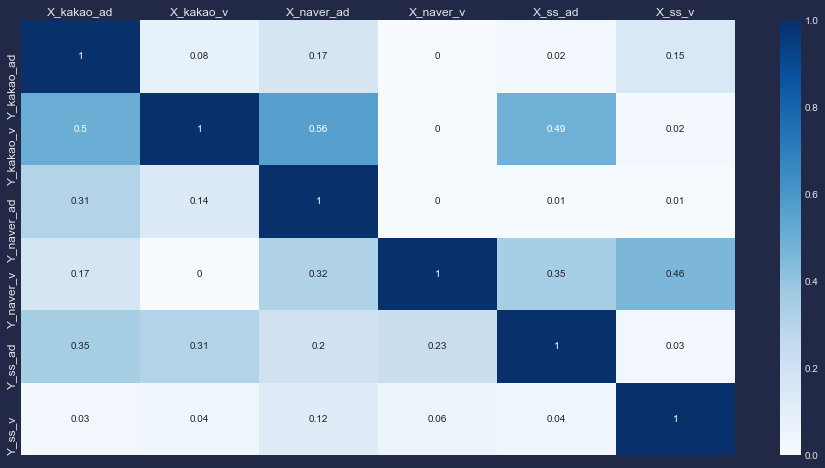

In [610]:
import seaborn as sns

plt.figure(figsize=(16,8))
ax = sns.heatmap(df_pairs, annot=True, cmap='Blues')
ax.xaxis.tick_top()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Cointegration Test : Johansen test

In [612]:
# 공적분 검정(혹은 요한슨 검정)은 다중 시계열 간 적분상 균형관계가 존재하는가를 판단한다.
# Cointegration 검정은 다중 시계열이 장기적 기간을 두고 안정적인 연관성을 보이는가? 를 확인해준다.
# Granger 검정을 통해 필터링한 변수 조합 중 최적 조합을 찾기 위해 Cointegration 검정을 한번 더 실시하고자 한다.

In [675]:
# Johansen test

from statsmodels.tsa.vector_ar.vecm import coint_johansen

sample_group = ['kakao_ad','kakao_v','naver_ad']
out = coint_johansen(df[sample_group], 1, 1)
out.lr1



array([103.86959373,  10.61924464,   4.41233967])

In [676]:
# 공적분 통계량
cvt_df = pd.DataFrame(out.cvt)
cvt_df.columns = ['90%', '95%', '99%']
cvt_df.index = sample_group
cvt_df


,90%,95%,99%
kakao_ad,32.0645,35.0116,41.0815
kakao_v,16.1619,18.3985,23.1485
naver_ad,2.7055,3.8415,6.6349


In [615]:
# out.cvt를 통해 각 유의수준에 해당하는 통계량을 확인할 수 있다. 
# 공적분 결과값이 해당 유의수준 통계량보다 크다면(우측, 단측검정) 유의하다.-->장기적으로 안정적인 연관성이 있다고 판단한다.

In [677]:
def calc_sig_dist(cols):
    out = coint_johansen(df[cols], 1, 1)
    stats = [round(x,2) for x in out.lr1]
    sigs = [round(x,2) for x in out.cvt[:, 1]]
    yns = [x>y for x,y in zip(stats,sigs)]
    dist = np.mean(np.array(stats) - np.array(sigs))
    

    print('stats: ',stats)
    print('sig-level: ',sigs)
    print('significant_yn: ',[x>y for x,y in zip(stats,sigs)])
    print('dist: ', round(dist,2))

In [678]:
df.columns

Index(['kakao_ad', 'kakao_v', 'naver_ad', 'naver_v', 'ss_ad', 'ss_v'], dtype='object')

In [679]:
calc_sig_dist(['kakao_ad', 'kakao_v', 'naver_ad', 'naver_v', 'ss_ad', 'ss_v'])

stats:  [308.97, 184.11, 95.16, 24.72, 11.76, 5.33]
sig-level:  [107.34, 79.34, 55.25, 35.01, 18.4, 3.84]
significant_yn:  [True, True, True, False, False, True]
dist:  55.15


### 모델링 

In [680]:
# Split Datasets (Train / Test) 

In [681]:
target_lag = 30
target_df = df[['kakao_ad', 'naver_ad', 'ss_ad']]

df_train = target_df.iloc[:-target_lag, :]
df_test = target_df.iloc[-target_lag:, :]

print(df_train.shape, df_test.shape)



(411, 3) (30, 3)


In [682]:
df_train

,kakao_ad,naver_ad,ss_ad
Date,,,
2022-01-04,112196.054688,363833.81250,75986.742188
2022-01-05,106158.601562,353381.68750,74731.570312
2022-01-06,100624.265625,336956.90625,74248.804688
2022-01-07,100624.265625,336459.18750,75600.523438
2022-01-10,97203.039062,333472.87500,75310.882812
...,...,...,...
2023-09-05,48900.000000,212000.00000,70700.000000
2023-09-06,49050.000000,214000.00000,70000.000000
2023-09-07,48750.000000,216500.00000,70400.000000


In [683]:
df_test

,kakao_ad,naver_ad,ss_ad
Date,,,
2023-09-12,48400.0,219500.0,70500.0
2023-09-13,47800.0,222000.0,70900.0
2023-09-14,48300.0,225500.0,71700.0
2023-09-15,48850.0,229500.0,72000.0
2023-09-18,48600.0,221500.0,70200.0
2023-09-19,47850.0,219500.0,69800.0
2023-09-20,47100.0,217500.0,69600.0
2023-09-21,45650.0,210000.0,68900.0
2023-09-22,45050.0,208000.0,68800.0


In [684]:
# Stationary Test : ADF 검정

In [624]:
# VAR 모델을 만들기 전에 입력 데이터의 정상성(staionary) 을 확보해야 한다. 
# 수정종가의 경우 주가 특성상 추세를 포함할 것이므로 정상성을 띄지 않을 가능성이 매우 높다.

# 시계열 정상성은 Augmented Dickey-Fully(ADF) 검정을 통해 확인 
# 귀무가설 : 정상성을 아니다.(단위근)  대립가설 : 정상성이다.

# ADF는 Dickey-Fully(DF) 검정을 더욱 일반화시킨 방식

In [685]:
# 삼성전자 

from statsmodels.tsa.stattools import adfuller

adf_sample = adfuller(df_train['ss_ad'], autolag='AIC') # AIC가 가장 낮은 lag(시차)를 자동 선택
adf_sample


(-1.7352735239814518,
 0.41303621102633536,
 2,
 408,
 {'1%': -3.446479704252724,
  '5%': -2.8686500930967354,
  '10%': -2.5705574627547096},
 6443.413256424029)

In [686]:
adf_df = pd.DataFrame(adf_sample[:4])
adf_df.columns = ['ss_ad']
adf_df.index = ['stat','p_value','lag','observ']

sig = pd.DataFrame(data={'ss_ad':adf_sample[4]['5%']}, index=['5%'])
adf_df = pd.concat([adf_df, sig], axis=0)
adf_df


,ss_ad
stat,-1.735274
p_value,0.413036
lag,2.000000
observ,408.000000
5%,-2.868650


In [687]:
def get_adf_df(data):
    adf_df = pd.DataFrame(adfuller(data, autolag='AIC')[:4])
    adf_df.columns = [col]
    adf_df.index = ['stat','p_value','lag','observ']

    sig = pd.DataFrame(data={col:adf_sample[4]['5%']}, index=['5%'])
    adf_df = pd.concat([adf_df, sig], axis=0)
    adf_df = adf_df.apply(lambda x : round(x, 2))
    return adf_df


In [688]:
get_adf_df(df["naver_ad"])

,ss_v
stat,-2.59
p_value,0.09
lag,0.00
observ,440.00
5%,-2.87


In [689]:
get_adf_df(df["kakao_ad"])

,ss_v
stat,-1.23
p_value,0.66
lag,4.00
observ,436.00
5%,-2.87


In [690]:
# 차분을 통해 간단히 분포를 바꿔주고 정상성을 다시 확인한다.
# (차분을 수행하면 첫번째 인덱스는 nan값으로 바뀐다. bfill()함수를 통해 두번째 값으로 첫번째 값을 채워주겠다.)


In [691]:
get_adf_df(df_train['ss_ad'].diff().bfill())


,ss_v
stat,-16.58
p_value,0.00
lag,1.00
observ,409.00
5%,-2.87


In [692]:
get_adf_df(df_train['naver_ad'].diff().bfill())


,ss_v
stat,-20.95
p_value,0.00
lag,0.00
observ,410.00
5%,-2.87


In [693]:
get_adf_df(df_train['kakao_ad'].diff().bfill())


,ss_v
stat,-10.17
p_value,0.00
lag,3.00
observ,407.00
5%,-2.87


In [694]:
# Step 7. VAR

In [695]:
df_train_ = df_train.copy()
df_train_['ss_ad'] = df_train['ss_ad'].diff().bfill()
df_train_['naver_ad'] = df_train['naver_ad'].diff().bfill()
df_train_['kakao_ad'] = df_train['kakao_ad'].diff().bfill()
df_train_


,kakao_ad,naver_ad,ss_ad
Date,,,
2022-01-04,-6037.453125,-10452.12500,-1255.171875
2022-01-05,-6037.453125,-10452.12500,-1255.171875
2022-01-06,-5534.335938,-16424.78125,-482.765625
2022-01-07,0.000000,-497.71875,1351.718750
2022-01-10,-3421.226562,-2986.31250,-289.640625
...,...,...,...
2023-09-05,-200.000000,500.00000,-500.000000
2023-09-06,150.000000,2000.00000,-700.000000
2023-09-07,-300.000000,2500.00000,400.000000


In [696]:
from statsmodels.tsa.api import VAR

var = VAR(df_train_)
var.select_order(maxlags=30).summary()


,AIC,BIC,FPE,HQIC
0,44.53*,44.57*,2.194e+19*,44.55*
1,44.55,44.68,2.233e+19,44.60
2,44.57,44.79,2.270e+19,44.65
3,44.60,44.91,2.336e+19,44.72
4,44.61,45.01,2.356e+19,44.77
5,44.63,45.13,2.419e+19,44.83
6,44.66,45.25,2.481e+19,44.89
7,44.68,45.37,2.548e+19,44.95
8,44.72,45.50,2.641e+19,45.03
9,44.75,45.62,2.713e+19,45.09


In [697]:
# AIC가 10 이상만 되어도 유의한 예측이라고 보기 어렵다.
# --> AIC 가 큰 경우  데이터 범위가 커서 예측 수준이 떨어지는 것이다.
# 데이터 변환 :  데이터 정규화  , 데이터 Leakage 문제 주의 할 것

In [699]:
df_train_norm = (df_train_/ df_train_.iloc[0]) - 1
df_train_norm


,kakao_ad,naver_ad,ss_ad
Date,,,
2022-01-04,0.000000,0.000000,0.000000
2022-01-05,0.000000,0.000000,0.000000
2022-01-06,-0.083333,0.571430,-0.615379
2022-01-07,-1.000000,-0.952381,-2.076919
2022-01-10,-0.433333,-0.714287,-0.769242
...,...,...,...
2023-09-05,-0.966873,-1.047837,-0.601648
2023-09-06,-1.024845,-1.191349,-0.442307
2023-09-07,-0.950310,-1.239186,-1.318681


In [700]:
print(get_adf_df(df_train_norm['kakao_ad']).loc['p_value'])
print(get_adf_df(df_train_norm['naver_ad']).loc['p_value'])
print(get_adf_df(df_train_norm['ss_ad']).loc['p_value'])


ss_v    0.0
Name: p_value, dtype: float64
ss_v    0.0
Name: p_value, dtype: float64
ss_v    0.0
Name: p_value, dtype: float64


In [701]:
var_norm = VAR(df_train_norm)
var_norm.select_order(maxlags=20).summary()


,AIC,BIC,FPE,HQIC
0,-5.583*,-5.553*,0.003761*,-5.571*
1,-5.576,-5.454,0.003787,-5.528
2,-5.562,-5.349,0.003842,-5.477
3,-5.540,-5.235,0.003928,-5.419
4,-5.528,-5.132,0.003974,-5.371
5,-5.505,-5.017,0.004069,-5.311
6,-5.483,-4.904,0.004158,-5.254
7,-5.455,-4.785,0.004277,-5.189
8,-5.421,-4.660,0.004425,-5.119
9,-5.395,-4.542,0.004542,-5.057


In [702]:

# 일반적으로 AIC 기준 2.0 이하는 모델이 타당하다고 할 수 있다.
# 모델은 과거 1주일치 데이터만 가지고도 어느 정도의 성능을 보이고 있으며,
# 예측 정확도는 14일 데이터가 확보되었을 때 가장 높았다.
# 이 에 맞게 모델의 시차(lag)를 14일로 적합시킨다.


In [704]:
model = var_norm.fit(14)
model.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 01, Dec, 2023
Time:                     15:37:14
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -3.93070
Nobs:                     397.000    HQIC:                  -4.71243
Log likelihood:          -523.748    FPE:                 0.00539291
AIC:                     -5.22523    Det(Omega_mle):      0.00396129
--------------------------------------------------------------------
Results for equation kakao_ad
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.720847         0.194612           -3.704           0.000
L1.kakao_ad         -0.208011         0.081403           -2.555           0.011
L1.naver_ad          0.072222         0.043887            1.6

In [705]:
# 잔차의 독립성 검정은 Durbin Watson 검정
from statsmodels.stats.stattools import durbin_watson

durbin_res = pd.DataFrame([model.resid.columns, 
                           [round(x,2) for x in durbin_watson(model.resid)]]).T
durbin_res.set_index([0])


,1
0,
kakao_ad,1.99
naver_ad,2.0
ss_ad,1.99


 ### Forecast

In [706]:
# 우리가 만든 모델의 lag는 예측을 위해 사용할 데이터 범위가 된다.-- 과거 14일치 데이터를 가지고 앞으로의 주가를 예측한다.

In [709]:
model.k_ar

14

In [711]:
# 3개 변수에 대한 최근 14일치의 데이터다. 


In [712]:
ins = df_train_norm.values[-model.k_ar:]
ins


array([[-1.04140819, -0.47379121, -1.39835182],
       [-1.03312655, -2.29160338, -1.876374  ],
       [-0.83436724,  0.72213784, -0.123626  ],
       [-0.98343672, -1.23918581, -0.76098891],
       [-1.09937965, -1.43053446, -1.        ],
       [-1.0662531 , -0.95216284, -1.23901109],
       [-0.85093052, -0.71297703, -0.84065927],
       [-1.14078784, -1.        , -4.26648492],
       [-1.02484491, -0.71297703, -1.15934073],
       [-0.96687345, -1.04783716, -0.60164818],
       [-1.02484491, -1.19134865, -0.44230745],
       [-0.95031017, -1.23918581, -1.31868146],
       [-0.91718362, -0.85648851, -0.92032964],
       [-1.        , -0.66513986, -1.39835182]])

In [713]:
f = model.forecast(y=ins, steps=7)
df_f = pd.DataFrame(f, columns=df_train_norm.columns)
df_f.columns = ["kakao_ad_diff", "naver_ad_diff", "ss_ad_diff"]
df_f


,kakao_ad_diff,naver_ad_diff,ss_ad_diff
0,-0.946862,-0.927723,-1.103067
1,-1.003623,-0.978336,-1.209049
2,-1.031982,-1.075859,-1.103660
3,-0.944605,-1.172842,-0.991304
4,-0.906063,-0.988250,-1.133609
5,-1.068987,-1.109276,-1.148081
6,-1.121798,-1.169389,-1.155884


In [715]:
# forecast 함수를 사용해 df_train 기준 마지막 14개 행의 데이터로 다음 7개 행을 예측한다.
# 예측한 값을 실제 값과 비교하기 위해서는 실제 값의 분포로 다시 돌려줘야 한다.

# 먼저 전체 데이터셋에 대해 첫번째 행 데이터 기준 정규화를 하였으니, 반대로 역정규화를 시킨다..


In [716]:
df_train_.iloc[0]

kakao_ad    -6037.453125
naver_ad   -10452.125000
ss_ad       -1255.171875
Name: 2022-01-04 00:00:00, dtype: float64

In [717]:
df_f_denorm= (df_f +1).mul(df_train_.iloc[0].to_numpy())
df_f_denorm

,kakao_ad_diff,naver_ad_diff,ss_ad_diff
0,-320.819778,-755.449957,129.366791
1,21.871349,-226.437913,262.392729
2,193.088193,792.890484,130.111406
3,-334.444813,1806.567309,-10.914658
4,-567.142734,-122.817297,167.702406
5,416.507272,1142.162571,185.866757
6,735.352600,1770.474515,195.661701


In [718]:
df_train["ss_ad"].iloc[-1]

70800.0

In [719]:
df_train

,kakao_ad,naver_ad,ss_ad
Date,,,
2022-01-04,112196.054688,363833.81250,75986.742188
2022-01-05,106158.601562,353381.68750,74731.570312
2022-01-06,100624.265625,336956.90625,74248.804688
2022-01-07,100624.265625,336459.18750,75600.523438
2022-01-10,97203.039062,333472.87500,75310.882812
...,...,...,...
2023-09-05,48900.000000,212000.00000,70700.000000
2023-09-06,49050.000000,214000.00000,70000.000000
2023-09-07,48750.000000,216500.00000,70400.000000


In [720]:
df_f_denorm

,kakao_ad_diff,naver_ad_diff,ss_ad_diff
0,-320.819778,-755.449957,129.366791
1,21.871349,-226.437913,262.392729
2,193.088193,792.890484,130.111406
3,-334.444813,1806.567309,-10.914658
4,-567.142734,-122.817297,167.702406
5,416.507272,1142.162571,185.866757
6,735.352600,1770.474515,195.661701


In [721]:
df_f_denorm["ss_ad"] = np.r_[df_train['ss_ad'].iloc[-1],
                            df_f_denorm['ss_ad_diff']].cumsum()[1:]

In [722]:
df_f_denorm["kakao_ad"] = np.r_[df_train['kakao_ad'].iloc[-1],
                            df_f_denorm['kakao_ad_diff']].cumsum()[1:]

In [723]:
df_f_denorm["naver_ad"] = np.r_[df_train['naver_ad'].iloc[-1],
                            df_f_denorm['naver_ad_diff']].cumsum()[1:]

In [724]:
df_f_denorm

,kakao_ad_diff,naver_ad_diff,ss_ad_diff,ss_ad,kakao_ad,naver_ad
0,-320.819778,-755.449957,129.366791,70929.366791,47929.180222,210744.550043
1,21.871349,-226.437913,262.392729,71191.759521,47951.051571,210518.112130
2,193.088193,792.890484,130.111406,71321.870927,48144.139763,211311.002614
3,-334.444813,1806.567309,-10.914658,71310.956269,47809.694950,213117.569923
4,-567.142734,-122.817297,167.702406,71478.658675,47242.552217,212994.752626
5,416.507272,1142.162571,185.866757,71664.525432,47659.059488,214136.915196
6,735.352600,1770.474515,195.661701,71860.187133,48394.412089,215907.389712


In [725]:
df_f_denorm.index = df_test.index[:7]
df_f_denorm

,kakao_ad_diff,naver_ad_diff,ss_ad_diff,ss_ad,kakao_ad,naver_ad
Date,,,,,,
2023-09-12,-320.819778,-755.449957,129.366791,70929.366791,47929.180222,210744.550043
2023-09-13,21.871349,-226.437913,262.392729,71191.759521,47951.051571,210518.112130
2023-09-14,193.088193,792.890484,130.111406,71321.870927,48144.139763,211311.002614
2023-09-15,-334.444813,1806.567309,-10.914658,71310.956269,47809.694950,213117.569923
2023-09-18,-567.142734,-122.817297,167.702406,71478.658675,47242.552217,212994.752626
2023-09-19,416.507272,1142.162571,185.866757,71664.525432,47659.059488,214136.915196
2023-09-20,735.352600,1770.474515,195.661701,71860.187133,48394.412089,215907.389712


In [726]:
def draw_subplot(axes, ax_i, col):
    d_test = df_test[col].iloc[:7]
    d_pred = df_f_denorm[col]
    
    d_test.diff() > 0
    
    axes[ax_i].plot(d_test, label='real')
    axes[ax_i].plot(d_pred, label='pred')
    
    hits = (d_test.diff() < 0) == (d_pred.diff() < 0)
    for i, hit in enumerate(hits):
        if hit:
            if i==0:
                pass
            if i+1==len(hits):
                i==None
            axes[ax_i].fill_between(x=d_test.index[i-1:i+1], 
                                    y1=d_pred[i-1:i+1],
                                    y2=d_test[i-1:i+1], 
                                    color='lightpink', 
                                    alpha=0.1)       
    axes[ax_i].set_title(col)
    axes[ax_i].legend(loc=(1,1))

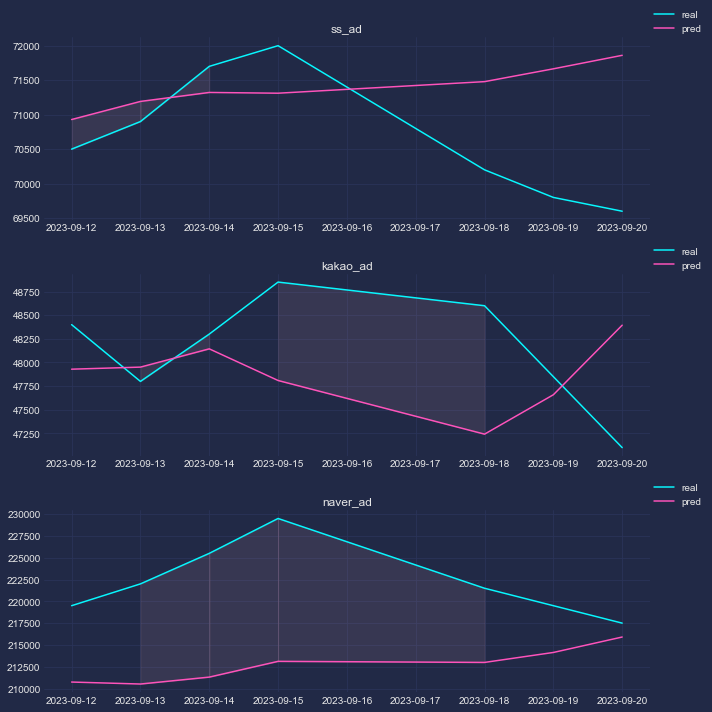

In [662]:
# 시각화 : 예측치와 실제치

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

draw_subplot(axes, 0, 'ss_ad')
draw_subplot(axes, 1, 'kakao_ad')
draw_subplot(axes, 2, 'naver_ad')

plt.tight_layout()
plt.show()
